In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
import os
for dirname, _, filenames in os.walk('C:/Users/anmol/UCDPA_AnmolRattan/UCDPA_AnmolRattan'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/anmol/UCDPA_AnmolRattan/UCDPA_AnmolRattan\.gitattributes
C:/Users/anmol/UCDPA_AnmolRattan/UCDPA_AnmolRattan\.gitignore
C:/Users/anmol/UCDPA_AnmolRattan/UCDPA_AnmolRattan\Additional Functions.ipynb
C:/Users/anmol/UCDPA_AnmolRattan/UCDPA_AnmolRattan\heart.csv
C:/Users/anmol/UCDPA_AnmolRattan/UCDPA_AnmolRattan\o2Saturation.csv
C:/Users/anmol/UCDPA_AnmolRattan/UCDPA_AnmolRattan\Pract Additional Functions.ipynb
C:/Users/anmol/UCDPA_AnmolRattan/UCDPA_AnmolRattan\Practice.ipynb
C:/Users/anmol/UCDPA_AnmolRattan/UCDPA_AnmolRattan\Project Heart Attack Prediction-Copy1.ipynb
C:/Users/anmol/UCDPA_AnmolRattan/UCDPA_AnmolRattan\Project Heart Attack Prediction.ipynb
C:/Users/anmol/UCDPA_AnmolRattan/UCDPA_AnmolRattan\Untitled.ipynb
C:/Users/anmol/UCDPA_AnmolRattan/UCDPA_AnmolRattan\.git\COMMIT_EDITMSG
C:/Users/anmol/UCDPA_AnmolRattan/UCDPA_AnmolRattan\.git\config
C:/Users/anmol/UCDPA_AnmolRattan/UCDPA_AnmolRattan\.git\description
C:/Users/anmol/UCDPA_AnmolRattan/UCDPA_AnmolRattan\.git\FETCH_H

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, r2_score, auc

In [32]:
df = pd.read_csv("C:/Users/anmol/UCDPA_AnmolRattan/UCDPA_AnmolRattan/heart.csv")

In [33]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


1    165
0    138
Name: output, dtype: int64


Text(0.5, 1.0, 'Distribution of target values')

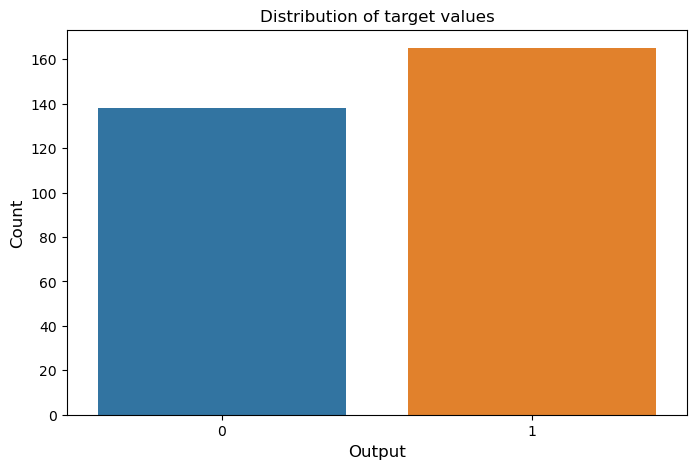

In [34]:
print(df['output'].value_counts())
plt.figure(figsize = (8, 5))
sns.countplot(x = heart['output'])
plt.xlabel("Output", size = 12)
plt.ylabel("Count", size = 12)
plt.title("Distribution of target values", size = 12)

In [35]:
rel = cor['output'].sort_values(ascending = False)
rel

output      1.000000
cp          0.433798
thalachh    0.421741
slp         0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trtbps     -0.144931
age        -0.225439
sex        -0.280937
thall      -0.344029
caa        -0.391724
oldpeak    -0.430696
exng       -0.436757
Name: output, dtype: float64

In [36]:
l = []
for i in range (len(rel)):
    if rel[i] > 0:
        l.append(rel.index[i])
l

['output', 'cp', 'thalachh', 'slp', 'restecg']

In [37]:
x = df.iloc[:,:-1]
# x.drop('output', axis = 1, inplace = True)
x.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [38]:
col = x.columns
std = StandardScaler()
x = std.fit_transform(x)
x = pd.DataFrame(data = x, columns = col)
x.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


In [39]:
y = df.loc[:,'output']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [41]:
best = 0
esti = 0
best_predict = 0
l = []
for i in range (20, 110):
    rcla = RandomForestClassifier(n_estimators = i)
    rcla.fit(x_train, y_train)
    predict = rcla.predict(x_test)
    acu = accuracy_score(predict, y_test)
    l.append(acu)
    if best < acu:
        best = acu
        best_predict = predict

Text(0.5, 1.0, 'Variation of Accuracy with Estimators')

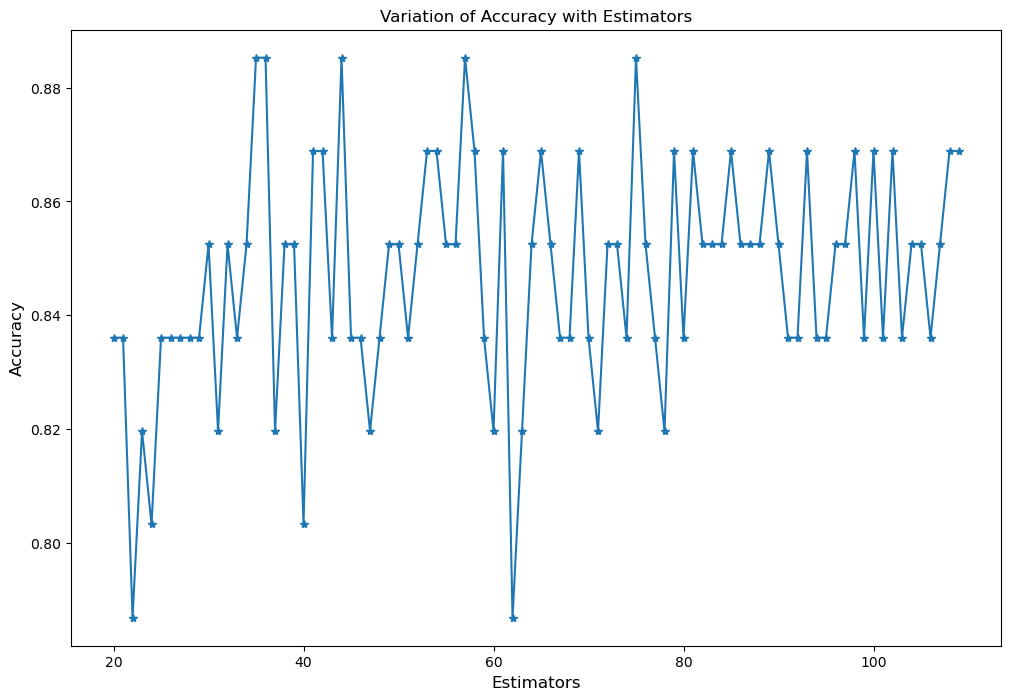

In [44]:
plt.figure(figsize = (12,8))
plt.plot(range (20 ,110), l, marker = "*")
plt.xlabel("Estimators", size = 12)
plt.ylabel("Accuracy", size = 12)
plt.title("Variation of Accuracy with Estimators", size = 12)

Text(0.5, 1.0, 'ROC Curve')

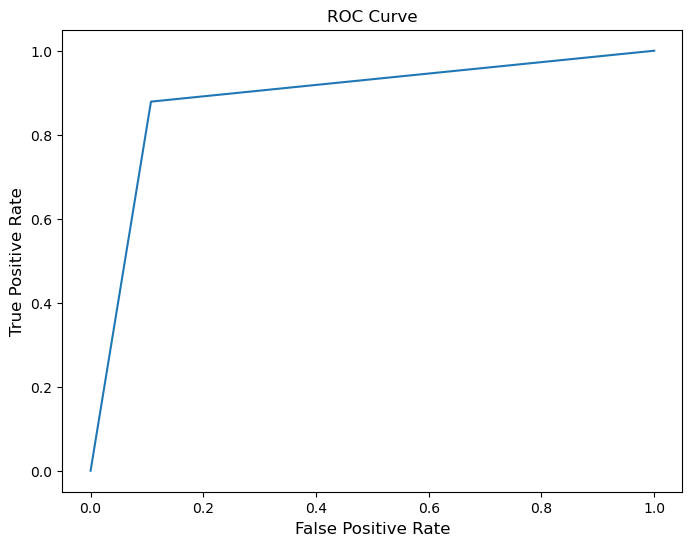

In [49]:
fpr, tpr, threshould = roc_curve(best_predict, y_test)
plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)

In [55]:
scla = SVC()
scla.fit(x_train, y_train)
predict = scla.predict(x_test)

Text(0.5, 1.0, 'ROC Curve')

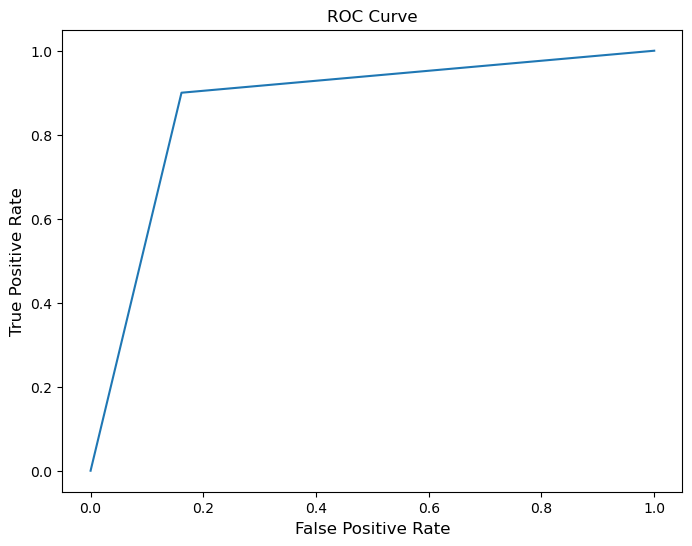

In [56]:
fpr, tpr, threshould = roc_curve(predict, y_test)
plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)

In [57]:
l = []
maxi = 0
ind = 0
best = 0
best_predict = 0
for i in range (4, 40):
    kcla = KNeighborsClassifier(n_neighbors = i)
    kcla.fit(x_train, y_train)
    predict = kcla.predict(xtest)
    acu = accuracy_score(predict, y_test)
    l.append(acu)
    if maxi < acu :
        maxi = acu
        ind = i
        best = acu
        best_predict = predict

C:\Users\anmol\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\anmol\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Text(0.5, 1.0, 'Accuracy variation with Neighbors')

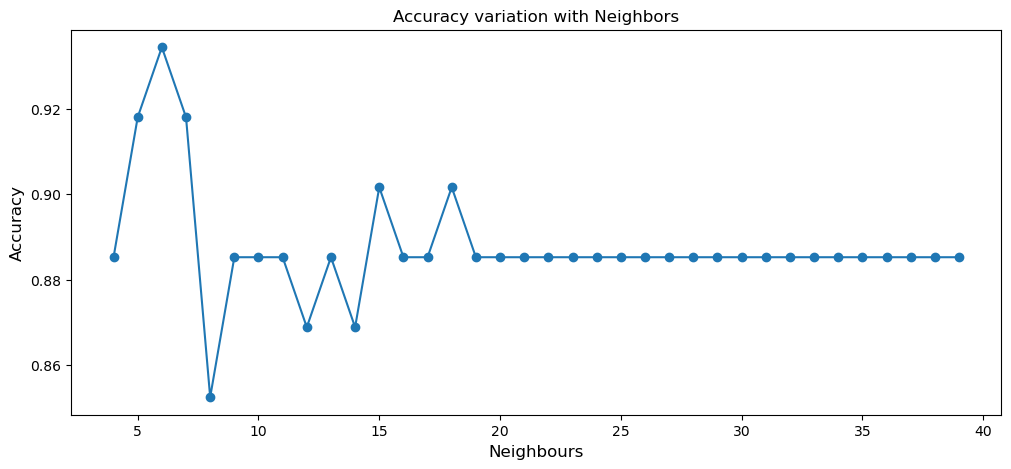

In [58]:
plt.figure(figsize = (12,5))
plt.plot(range (4, 40), l, marker = 'o')
plt.xlabel('Neighbours', size = 12)
plt.ylabel('Accuracy', size = 12)
plt.title('Accuracy variation with Neighbors', size = 12)

Text(0.5, 1.0, 'ROC Curve')

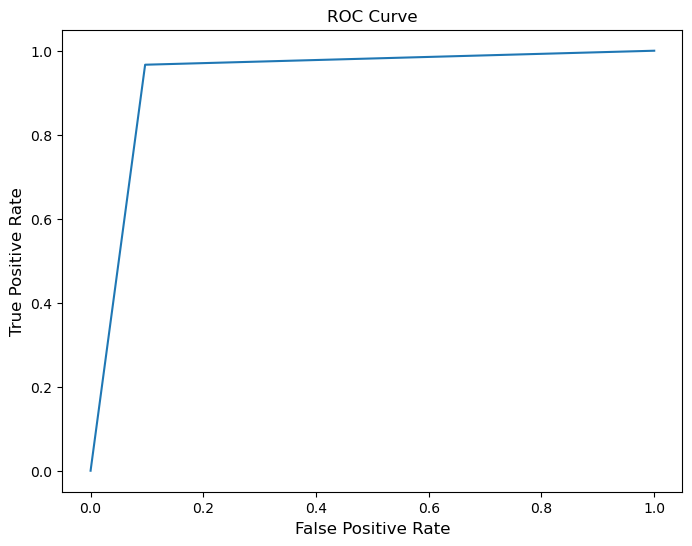

In [59]:
fpr, tpr, threshould = roc_curve(best_predict, y_test)
plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)